In [1]:
# 1.1) Import packages
import numpy as np
from importlib import reload
from brian2 import*
import pickle
import NeuroTools as nt
from NeuroTools import signals, analysis
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.io as sio
import seaborn as sns
import matplotlib.patches as mpatches
#import plotpy.express as px
%matplotlib notebook

# Import and reload my helpers module for iterative development
import helpers
reload(helpers)
from helpers.Function_DataAnalysis import *
#from helpers.bin import *

# default dict. to assign values
from collections import defaultdict

# 1.2) Import data of simulations
nameInput = 'Plasticity_Rule_test'
#name_simparam = nameInput + '_SimParams.pickle'

name_VoltCell_STDP = nameInput + '_VoltageCell_Plasticity.pickle'
#name_VoltCell_noSTDP = nameInput + '_VoltageCell_NoPlasticity.pickle'

#name_SpikeT_noSTDP = nameInput + '_SpikeTimes_NoPlasticity.pickle'
name_SpikeT_STDP = nameInput + '_SpikeTimes_Plasticity.pickle'

#name_PV = nameInput + '_PlasticityVariables.pickle'
#name_Input_noSTDP = nameInput + 'AfterSim_NoPlasticity.pickle'
name_Input_STDP = nameInput + 'AfterSim_Plasticity.pickle'

name_Pop = nameInput + '_Population_rate.pickle'

name_PV = nameInput + '_PlasticityVariables.pickle'

#with open(name_SpikeT_noSTDP, 'rb') as st:
#    SpikeTimes_noSTDP = pickle.load(st)
#with open(name_VoltCell_noSTDP, 'rb') as vc:
#    VoltCell_noSTDP = pickle.load(vc)
#with open(name_Input_noSTDP, 'rb') as inp:
#    Input_noSTDP = pickle.load(inp)

with open(name_SpikeT_STDP, 'rb') as stm:
    SpikeTimes_STDP = pickle.load(stm)
with open(name_VoltCell_STDP, 'rb') as vcm:
    VoltCell_STDP = pickle.load(vcm)
with open(name_Input_STDP, 'rb') as inpm:
    Input_STDP = pickle.load(inpm)
with open(name_Pop, 'rb') as mje:
    Pop_Rate = pickle.load(mje)
with open(name_PV, 'rb') as par:
    PV = pickle.load(par)

In [2]:
# 2) Split Data - before/after adaptation    

# before = start_t:t_beforeAdaptation
# after = t_beforeAdaptaion:end
# indicated by BA (BeforeAdaptation) and AA (AfterAdaptation) accordingly

start = 0 # remove first second of data due to transient
t_beforeAdaptation = int(len(Input_STDP['I'][1])/2)

nrInputs=Input_STDP['I'].shape[0] # number of inputs
nrPC = VoltCell_STDP['PC_coupled'].shape[0]
nrDCN = VoltCell_STDP['DCN_coupled'].shape[0]
nrIO = VoltCell_STDP['IOsoma_coupled'].shape[0]
nrDummy = nrPC*nrInputs
lengthSim =VoltCell_STDP['PC_coupled'].shape[1]

#### NOTE: What to do with 'regular' Input?

for k in range(0,nrIO):
    spikeio_c, _ = find_peaks(VoltCell_STDP['IOsoma_coupled'][k], height=0.0, distance = 10) 
    spikeio_uc, _ = find_peaks(VoltCell_STDP['IOsoma_uncoupled'][k], height=0.0, distance = 10) 
    spikeio_c = spikeio_c/1000
    spikeio_uc = spikeio_uc/1000
    SpikeTimes_STDP['IO_uncoupled'][k]=spikeio_uc
    SpikeTimes_STDP['IO_coupled'][k]=spikeio_c

<IPython.core.display.Javascript object>


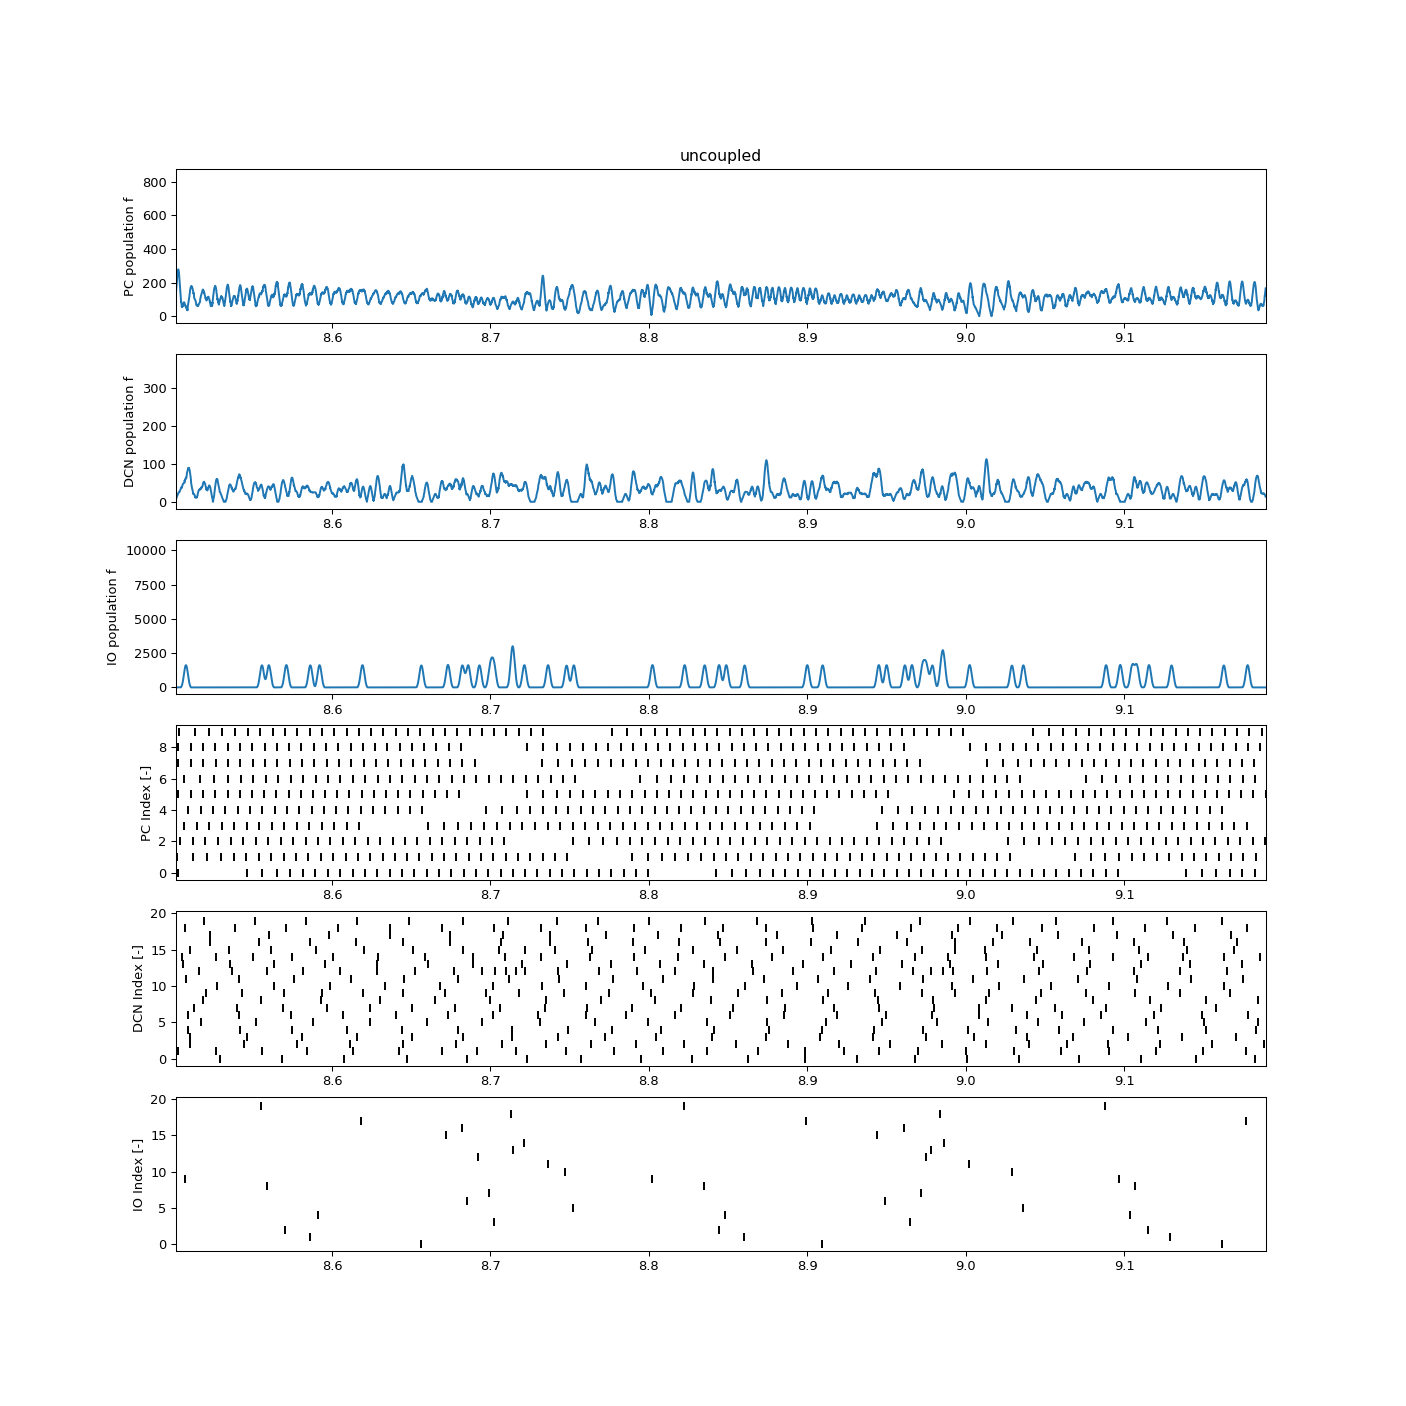

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
 [py.warnings]


In [3]:
# UnCoupled Figure

t=Pop_Rate['t']/1e3 # time 
# figure 1 : Uncoupled

fig, axs = plt.subplots(6, 1,figsize=(15,15))

# subplot 1: population frequency PC
ax1= plt.subplot(6,1,1)
plt.title('uncoupled')
plt.plot(t,Pop_Rate['PC_uncoupled'])
plt.ylabel('PC population f')
# subplot 2: population frequency DCN
ax2 = plt.subplot(612, sharex=ax1)
plt.plot(t,Pop_Rate['DCN_uncoupled'])
plt.ylabel('DCN population f')

# subplot 3: population frequency IO
ax3 = plt.subplot(613,sharex = ax1)
plt.plot(t,Pop_Rate['IO_uncoupled'])
plt.ylabel('IO population f')

# Raster plot PC
for i in range(0,nrPC):
    ax3 = plt.subplot(6,1,4, sharex=ax1)
    ax3.set_ylabel('PC Index [-]')
    neu = SpikeTimes_STDP['PC_uncoupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')

# Raster Plot DCN
for i in range(0,nrDCN):
    ax4 = plt.subplot(6,1,5, sharex=ax1)
    ax4.set_ylabel('DCN Index [-]')
    neu = SpikeTimes_STDP['DCN_uncoupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')

# Raster Plot IO
for i in range(0,nrIO):
    ax5 = plt.subplot(6,1,6, sharex=ax1)
    ax5.set_ylabel('IO Index [-]')
    neu = SpikeTimes_STDP['IO_uncoupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')
    
    


<IPython.core.display.Javascript object>


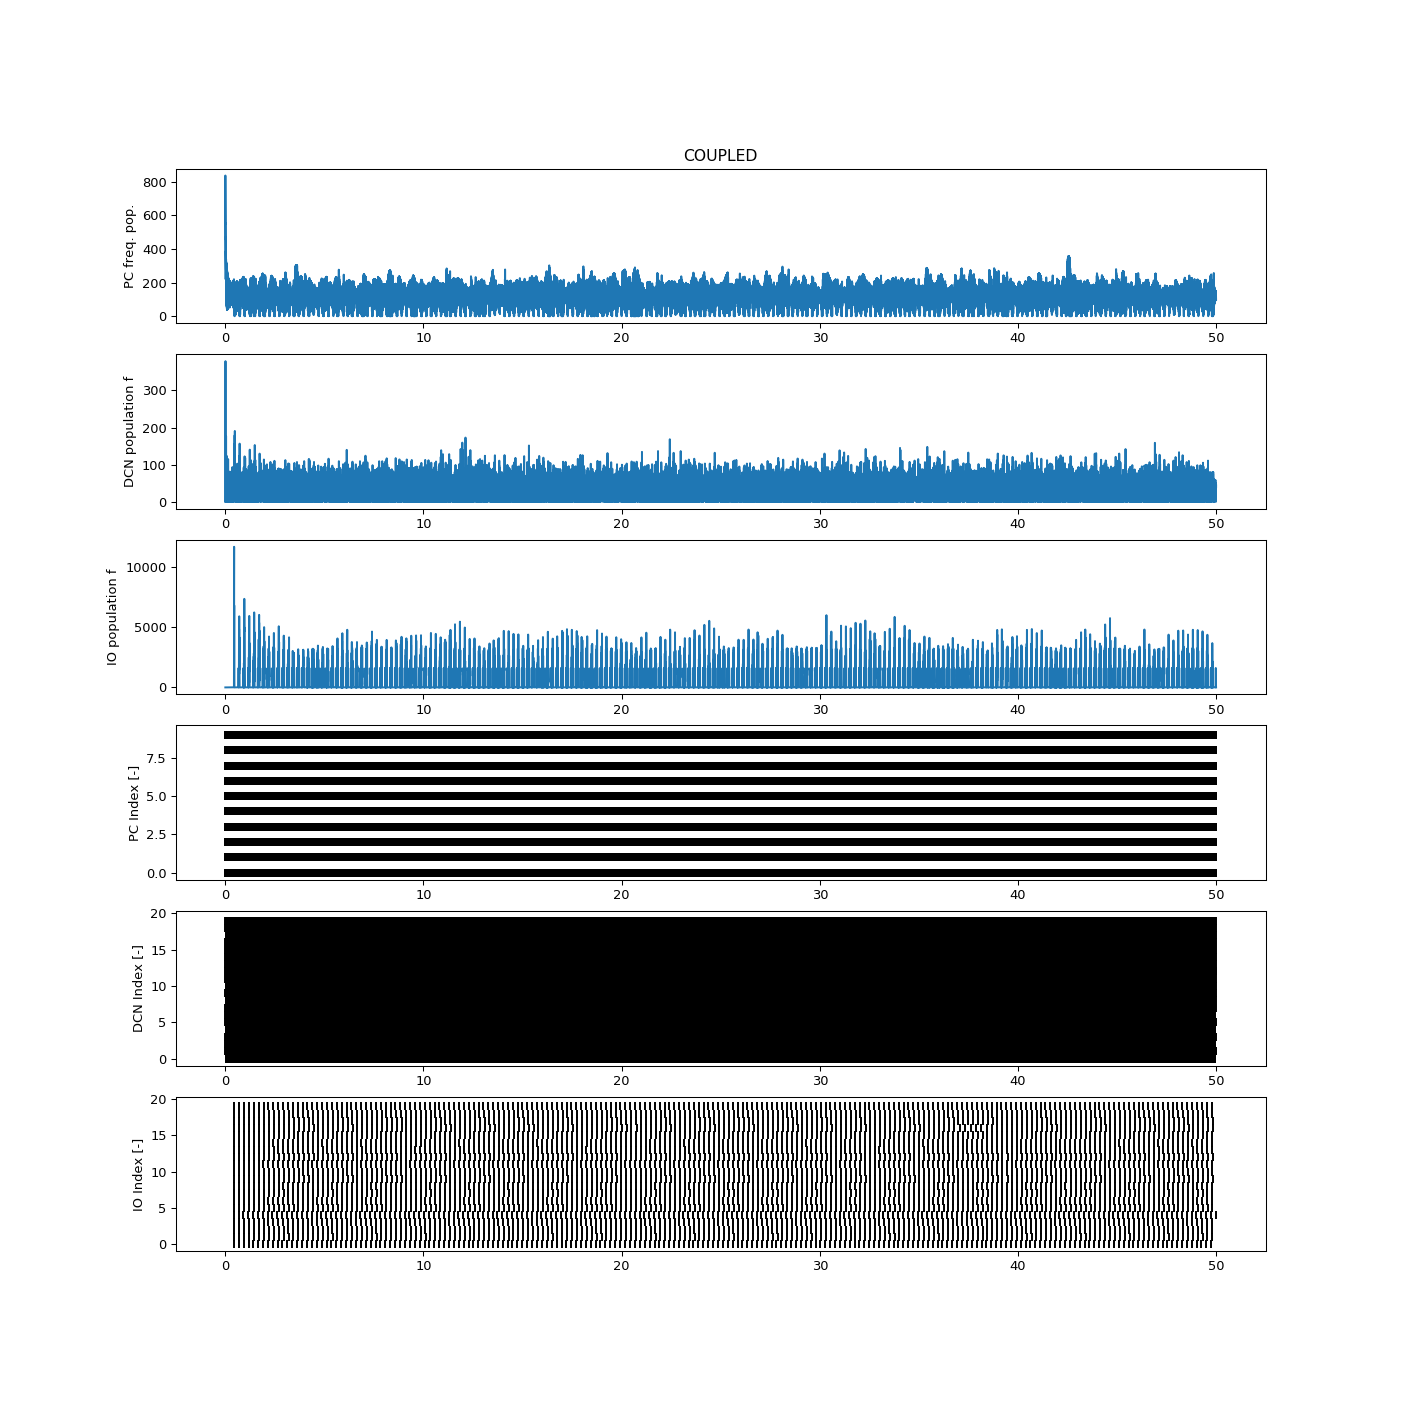

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
 [py.warnings]


nr PC spikes 5565
nr IO spikes connected to PC 173
nr PC spikes 5527
nr IO spikes connected to PC 179
nr PC spikes 5468
nr IO spikes connected to PC 180
nr PC spikes 5468
nr IO spikes connected to PC 176
nr PC spikes 5494
nr IO spikes connected to PC 193
nr PC spikes 5576
nr IO spikes connected to PC 186
nr PC spikes 5513
nr IO spikes connected to PC 179
nr PC spikes 5561
nr IO spikes connected to PC 174
nr PC spikes 5580
nr IO spikes connected to PC 175
nr PC spikes 5500
nr IO spikes connected to PC 185


In [4]:
# figure 2 : COUPLED
f, a = plt.subplots(6, 1,figsize=(15,15))

# subplot 1: population frequency PC
ax1= plt.subplot(6,1,1)
plt.title('COUPLED')
plt.plot(t,Pop_Rate['PC_coupled'])
plt.ylabel('PC freq. pop.')
# subplot 2: population frequency DCN
ax2 = plt.subplot(612, sharex=ax1)
plt.plot(t,Pop_Rate['DCN_coupled'])
plt.ylabel('DCN population f')

# subplot 3: population frequency IO
ax3 = plt.subplot(613,sharex = ax1)
plt.plot(t,Pop_Rate['IO_coupled'])
plt.ylabel('IO population f')

# Raster plot PC
for i in range(0,nrPC):
    ax3 = plt.subplot(6,1,4, sharex=ax1)
    ax3.set_ylabel('PC Index [-]')
    neu = SpikeTimes_STDP['PC_coupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')

# Raster Plot DCN
for i in range(0,nrDCN):
    ax4 = plt.subplot(6,1,5, sharex=ax1)
    ax4.set_ylabel('DCN Index [-]')
    neu = SpikeTimes_STDP['DCN_coupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')

# Raster Plot IO
for i in range(0,nrIO):
    ax5 = plt.subplot(6,1,6, sharex=ax1)
    ax5.set_ylabel('IO Index [-]')
    neu = SpikeTimes_STDP['IO_coupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')
con=[9,10, 18, 17, 0, 6, 5, 12, 16, 11]
for i in range(0,nrPC):
    print('nr PC spikes', len(SpikeTimes_STDP['PC_uncoupled'][i]))
    print('nr IO spikes connected to PC', len(SpikeTimes_STDP['IO_uncoupled'][con[i]]))

<IPython.core.display.Javascript object>


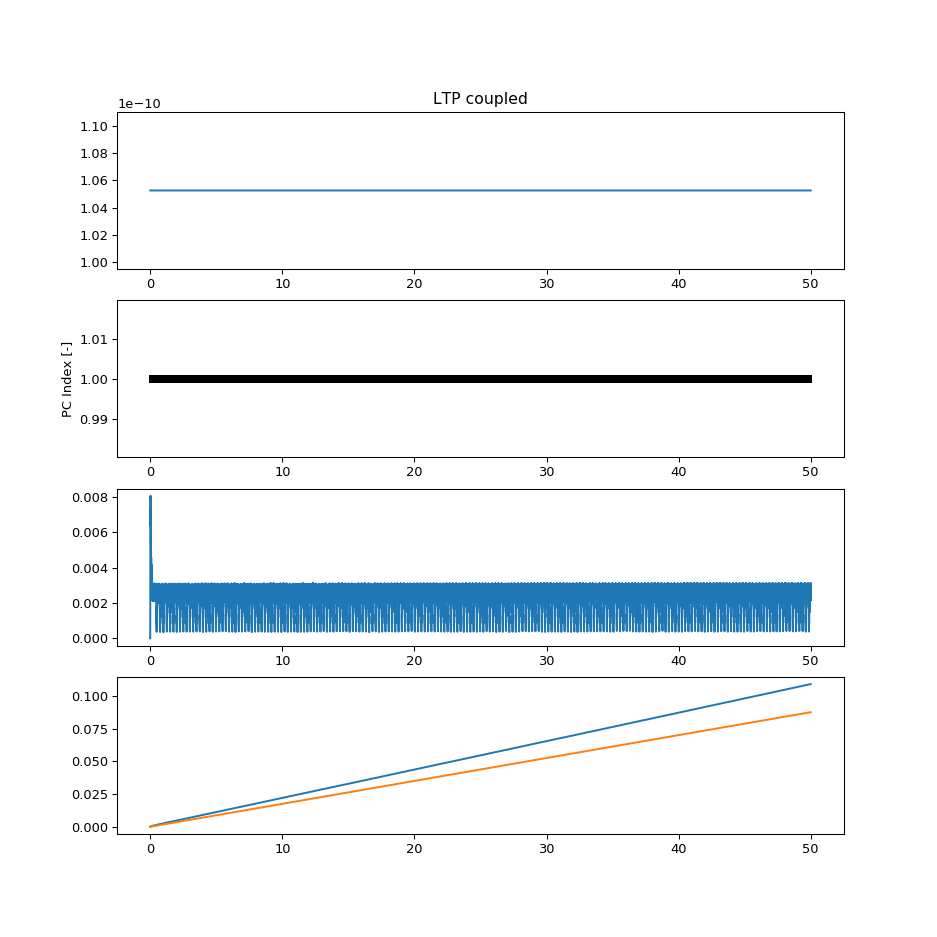

<IPython.core.display.Javascript object>


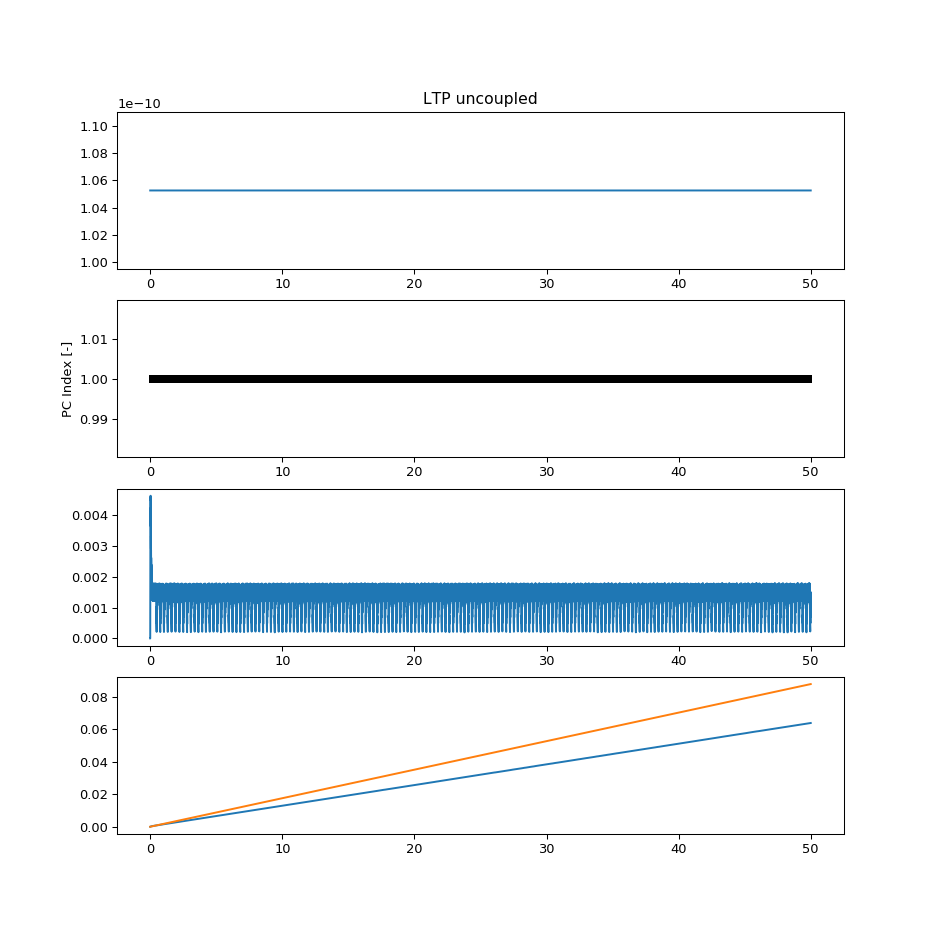

In [5]:
# LTP Coupled/Uncoupled
ls = int(max(SpikeTimes_STDP['IO_coupled'][0]))+1
static_w=0.52631579

time = np.linspace(0,ls,lengthSim)
fltp, altp = plt.subplots(4,1,figsize=(10,10))

ax1 = plt.subplot(411)
plt.title('LTP coupled')
plt.plot(time,Input_STDP['I'][0]*static_w)
#plt.xlabel('time [ms]')
#ax1 = plt.subplot(422,sharex=ax1)
#plt.plot(time,Input_STDP['I'][1]*0.47368421)

ax3 = plt.subplot(4,1,2, sharex=ax1)
ax3.set_ylabel('PC Index [-]')
neu = SpikeTimes_STDP['PC_coupled'][0]
lensim = len(neu)
yPC=np.ones((lensim,1))*1
plt.scatter(x=neu,y=yPC,marker='|', color='black')

ax3 = plt.subplot(413, sharex=ax1)
plt.plot(time,PV['a_PC_coupled'][0])
ax2 = plt.subplot(414, sharex=ax1)
plt.plot(time,PV['weight_PC_coupled'][0])
plt.plot(time,0.2*static_w*(time)/60)
plt.show()

fltpu, altpu = plt.subplots(4,1,figsize=(10,10))

ax1 = plt.subplot(411)
plt.title('LTP uncoupled')
plt.plot(time,Input_STDP['I'][0]*static_w)
#plt.xlabel('time [ms]')
#ax1 = plt.subplot(422,sharex=ax1)
#plt.plot(time,Input_STDP['I'][1]*0.47368421)

ax3 = plt.subplot(4,1,2, sharex=ax1)
ax3.set_ylabel('PC Index [-]')
neu = SpikeTimes_STDP['PC_uncoupled'][0]
lensim = len(neu)
yPC=np.ones((lensim,1))*1
plt.scatter(x=neu,y=yPC,marker='|', color='black')

ax3 = plt.subplot(413, sharex=ax1)
plt.plot(time,PV['a_PC_uncoupled'][0])
ax2 = plt.subplot(414, sharex=ax1)
plt.plot(time,PV['weight_PC_uncoupled'][0])
plt.plot(time,0.2*static_w*(time)/60)


<IPython.core.display.Javascript object>


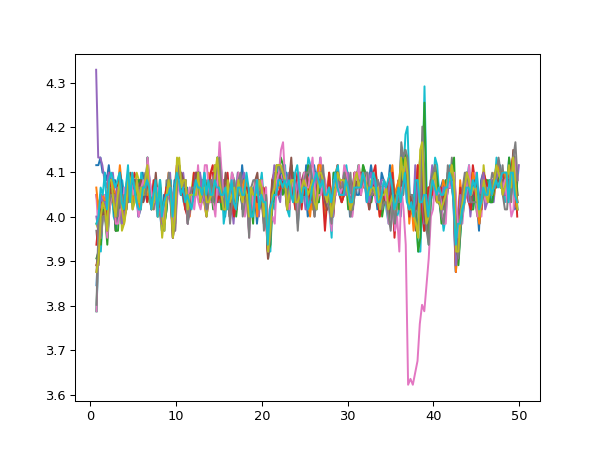

<IPython.core.display.Javascript object>


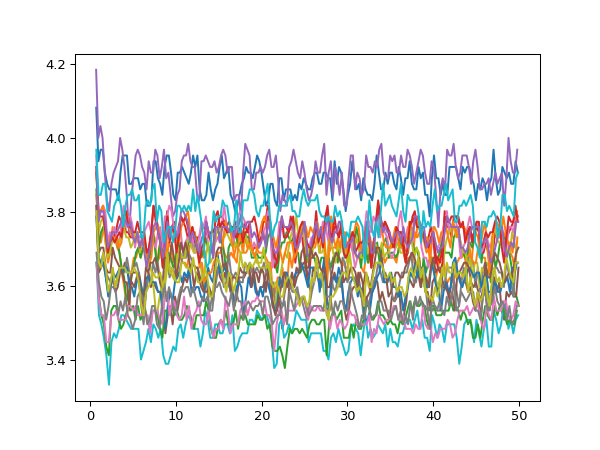

In [6]:
plt.figure()
for p in range(0,nrIO):
    freq=1/stat.isi(SpikeTimes_STDP['IO_coupled'][p])
    plt.plot(SpikeTimes_STDP['IO_coupled'][p][1:],freq)

plt.figure()   
for p in range(0,nrIO):
    freq=1/stat.isi(SpikeTimes_STDP['IO_uncoupled'][p])
    plt.plot(SpikeTimes_STDP['IO_uncoupled'][p][1:],freq) 
plt.show()

<IPython.core.display.Javascript object>


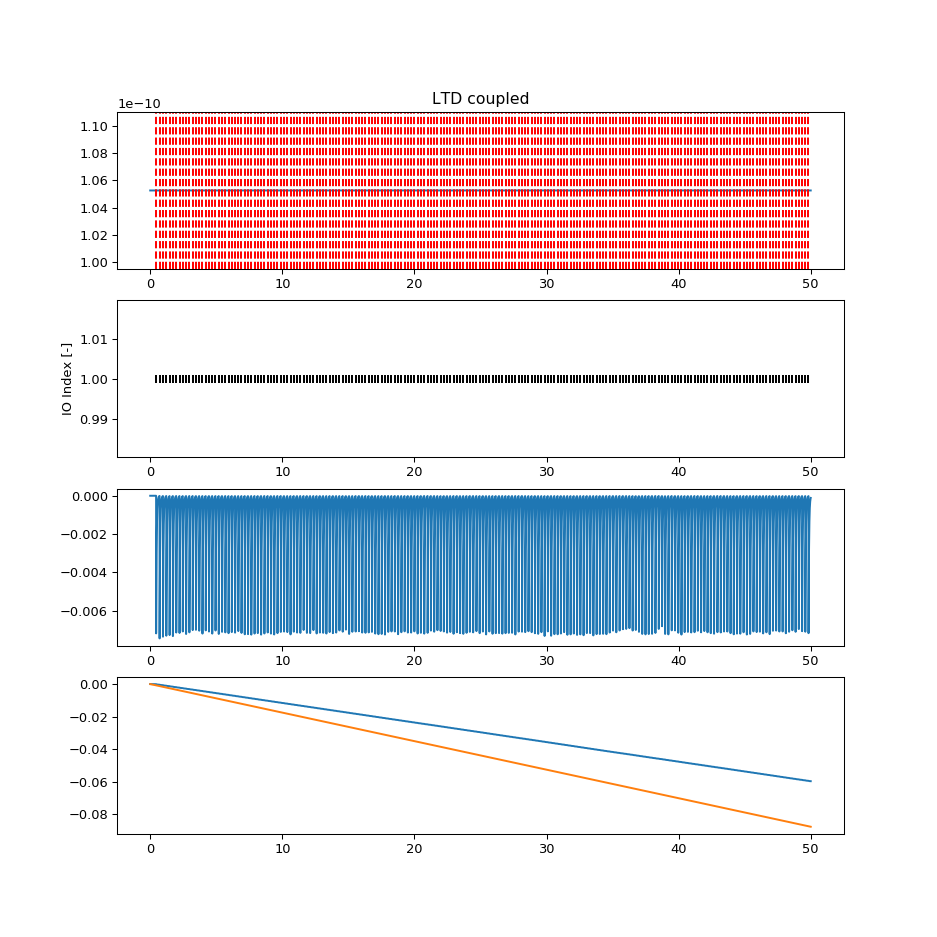

In [7]:
# LTD 
fltd, altd = plt.subplots(4,1,figsize=(10,10))

ax1 = plt.subplot(411)
plt.title('LTD coupled')
plt.plot(time,Input_STDP['I'][0]*static_w)
for k in SpikeTimes_STDP['IO_coupled'][9]:
    plt.axvline(x=k, color='r', linestyle='--')
#plt.xlabel('time [ms]')
#ax1 = plt.subplot(422,sharex=ax1)
#plt.plot(time,Input_STDP['I'][1]*0.47368421)

ax2 = plt.subplot(4,1,2, sharex=ax1)
ax2.set_ylabel('IO Index [-]')
neu = SpikeTimes_STDP['IO_coupled'][9]
lensim = len(neu)
yPC=np.ones((lensim,1))*1
plt.scatter(x=neu,y=yPC,marker='|', color='black')


ax3 = plt.subplot(413, sharex=ax1)
plt.plot(time,PV['a_IO_coupled'][0])
  

ax4 = plt.subplot(414, sharex=ax1)
plt.plot(time,PV['weight_IO_coupled'][0])
plt.plot(time,-0.2*static_w*(time)/60)

plt.show()

<IPython.core.display.Javascript object>


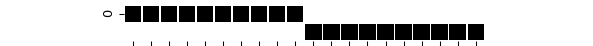

<IPython.core.display.Javascript object>


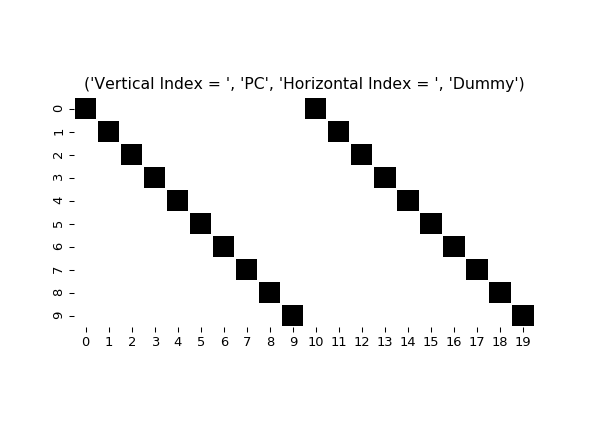

<IPython.core.display.Javascript object>


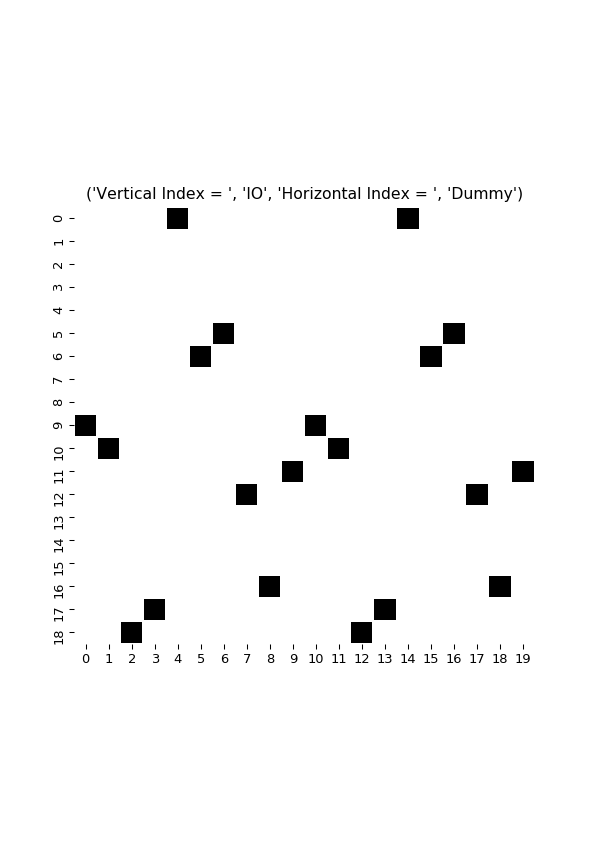

<IPython.core.display.Javascript object>


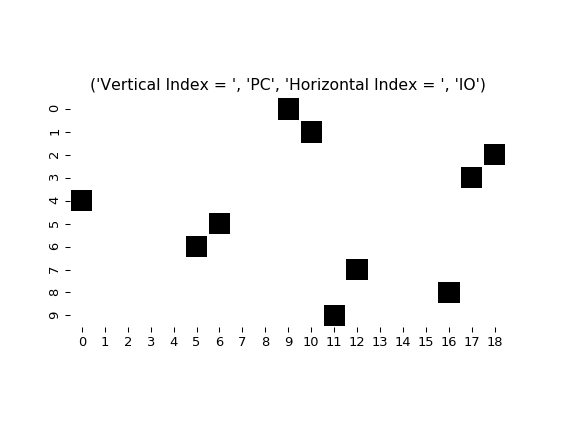

<IPython.core.display.Javascript object>


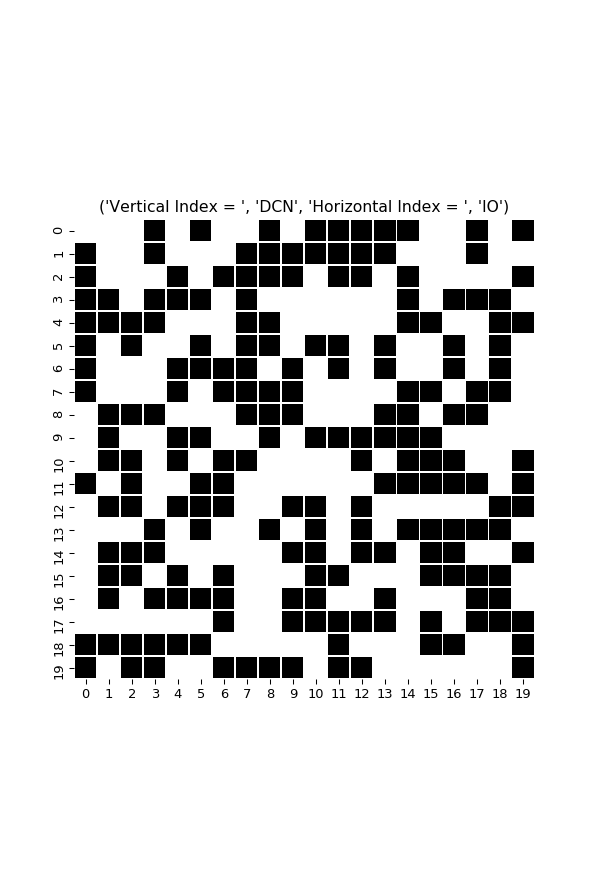

<IPython.core.display.Javascript object>


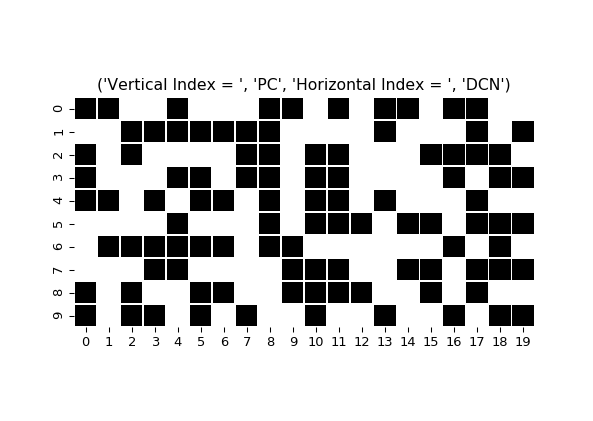

In [8]:
if nrInputs == 5 :
    # Input - Dummy
    i_ind = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
    j_ind = np.arange(nrDummy)
    Connectivity(i_ind,j_ind,'Input','Dummy')

    # Dummy-PC
    i_dPC = np.arange(nrInputs*nrPC)
    j_dPC = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    Connectivity(j_dPC,i_dPC,'PC','Dummy')
    # IO - dummy 
    i_IOd = [9, 10, 18, 17, 0, 6, 5, 12, 16, 11, 9, 10, 18, 17, 0, 6, 5, 12, 16, 11, 9, 10, 18, 17, 0, 6, 5, 12, 16, 11, 9, 10, 18, 17, 0, 6, 5, 12, 16, 11, 9, 10, 18, 17, 0, 6, 5, 12, 16, 11]
    j_IOd=np.arange(nrInputs*nrPC)
    Connectivity(i_IOd,j_IOd,'IO','Dummy')
    # IO - PC
    i_IOPC = [9,10, 18, 17, 0, 6, 5, 12, 16, 11]
    j_IOPC = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    Connectivity(j_IOPC,i_IOPC,'PC','IO')
    # DCN - IO
    i_DCNIO = [0, 0 ,0, 0 ,0,0 ,0, 0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,11 ,11 ,11 ,11 ,11 ,11 ,11 ,11 ,11 ,11 ,12 ,12 ,12 ,12 ,12 ,12 ,12 ,12 ,12 ,12 ,13 ,13 ,13 ,13 ,13 ,13 ,13 ,13 ,13 ,13 ,14 ,14 ,14 ,14,14 ,14 ,14 ,14 ,14 ,14 ,15 ,15 ,15 ,15 ,15 ,15 ,15 ,15 ,15 ,15 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,17 ,17 ,17 ,17 ,17 ,17 ,17 ,17 ,17 ,17 ,18 ,18 ,18 ,18 ,18 ,18 ,18 ,18 ,18 ,18 ,19 ,19,19 ,19 ,19 ,19 ,19 ,19 ,19 ,19]
    j_DCNIO = [5 ,7, 10, 15 ,4 ,6 ,9 ,3 ,1, 11 ,8 ,4 ,11, 17, 14 ,9 ,3 ,2 ,0, 15 ,0 ,3 ,7 ,2 ,9 ,10, 19, 17 ,4 ,14 ,2 ,8, 16 ,3 ,5, 19, 12 ,0, 18, 17, 12 ,9 ,6, 10, 13 ,3 ,4 ,2, 15, 18 ,2, 14, 19, 18, 16, 17 ,5 ,8 ,4 ,9, 14 ,6 ,8, 16, 12, 19 ,4 ,5 ,0 ,3, 16 ,9,13 ,1, 17 ,0 ,8, 14 ,7, 10, 10 ,6, 13 ,1 ,4, 18 ,8, 12, 17 ,0 ,7, 11 ,3 ,1 ,9, 10,6, 17, 13, 18 ,8, 16 ,7 ,1 ,6, 12, 10, 19, 15 ,4, 12 ,2 ,4 ,1, 19, 13, 17, 16 ,8 ,9, 12 ,4 ,3 ,1 ,0 ,8 ,2, 11, 14, 13, 10, 17, 12, 13, 16, 11 ,4 ,2 ,8 ,5, 15, 17, 13, 19, 14 ,1 ,4, 16 ,6 ,3 ,5, 16 ,0, 19 ,2 ,9, 18 ,6 ,4 ,1, 10 ,8, 15 ,3 ,0 ,1 ,4, 13, 19 ,7 ,3 ,9, 14, 18, 16, 17 ,5, 19, 11, 10, 11 ,6, 15, 10 ,5, 12, 17 ,4 ,8, 16, 14 ,8,
     10, 15, 4, 11 ,2 ,7 ,5, 18]
    Connectivity(i_DCNIO,j_DCNIO,'DCN','IO')

    # PC - DCN
    i_PCDCN = [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,2 ,2 ,2 ,2 ,2 ,2 ,2 ,2 ,2 ,2 ,3 ,3 ,3 ,3 ,3 ,3 ,3
     ,3 ,3 ,3 ,4 ,4 ,4 ,4 ,4 ,4 ,4 ,4 ,4 ,4 ,5 ,5 ,5 ,5 ,5 ,5 ,5 ,5 ,5 ,5 ,6 ,6 ,6 ,6 ,6 ,6 ,6 ,6 ,6 ,6 ,7 ,7 ,7 ,7
     ,7 ,7 ,7 ,7 ,7 ,7 ,8 ,8 ,8 ,8 ,8 ,8 ,8 ,8 ,8 ,8 ,9 ,9 ,9 ,9 ,9 ,9 ,9 ,9 ,9 ,9]
    j_PCDCN = [15, 10, 18 ,3 ,8 ,7 ,1 ,4, 16 ,2 ,4, 14, 12, 10 ,2, 13 ,3 ,0, 15, 16 ,5 ,9 ,0, 13,14, 11, 15, 17, 16, 10, 16 ,1, 13, 17 ,9 ,3 ,5, 10, 12, 18 ,4, 12, 18 ,2 ,5, 13, 15 ,7 ,1 ,6 ,8, 16, 17 ,1, 13, 12, 15 ,7 ,4 ,2, 17 ,0, 14 ,7 ,3, 19 ,4 ,9 ,5 ,2, 18 ,4 ,0, 11, 15 ,3 ,9 ,1 ,8 ,2 ,19 ,1 ,11, 10 ,6 ,0 ,9, 17, 12 ,3 ,7, 11, 17 ,1 ,2, 14,5 ,4, 12 ,0]
    Connectivity(i_PCDCN,j_PCDCN,'PC','DCN')
elif nrInputs == 2:
    # Input-dummy
    i_ind = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    j_ind = np.arange(nrInputs*nrPC)
    Connectivity(i_ind,j_ind,'Input','Dummy')
    # dummy-PC
    i_dPC = np.arange(nrInputs*nrPC)
    j_dPC = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    Connectivity(j_dPC,i_dPC,'PC','Dummy')

    # IO - dummy
    i_IOd = [9,10, 18, 17, 0, 6, 5, 12, 16, 11, 9,10, 18, 17, 0, 6, 5, 12, 16, 11]
    j_IOd=np.arange(nrInputs*nrPC)
    Connectivity(i_IOd,j_IOd,'IO','Dummy')

    # IO - PC
    i_IOPC = [9,10, 18, 17, 0, 6, 5, 12, 16, 11]
    j_IOPC = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    Connectivity(j_IOPC,i_IOPC,'PC','IO')

    # DCN - IO
    i_DCNIO = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19]

    j_DCNIO =[8 , 19 , 10 ,  3 , 12 , 17 ,  11 ,  5 , 13 ,  14 , 11 ,  0 , 13 ,7 , 10 , 12 , 17 ,  9 ,  8 ,  3 ,  4 , 11 ,  7 ,  0 ,  6 ,  9 ,8 , 12 , 19 , 14 ,  4 ,  3 , 16 ,  0 ,  7 ,  1 , 14 ,  5 , 18 ,17 , 19 , 18 ,  1 , 15 ,  2 , 14 ,  8 ,  7 ,  0 ,  3 , 16 , 13 ,11 ,  5 ,  2 , 10 ,  8 ,  0 ,  7 , 18 , 16 , 11 ,  7 ,  0 ,  6 ,5 ,  9 , 18 , 13 ,  4 , 15 ,  0 , 17 ,  6 ,  8 ,  7 , 14 ,  9 ,18 ,  4 , 17 ,  7 , 14 , 13 ,  3 ,  1 ,  2 ,  8 , 16 ,  9 , 10 ,13 ,  1 ,  5 , 11 , 12 ,  4 , 15 ,  8 , 14 ,  7 ,  1 , 19 , 15 ,2 ,  6 , 14 ,  4 , 16 , 12 , 15 ,  2 ,  5 ,  0 , 17 , 14 , 19 ,13 , 16 ,  6 , 10 ,  9 , 18 , 12 ,  1 ,  6 ,  4 ,  2 , 19 ,  5 ,8 , 17 ,  5 , 15 , 14 , 18 , 10 , 16 ,  3 , 12 ,  3 , 10 , 12 ,13 , 15 ,  9 , 19 , 16 ,  1 ,  2 ,  2 , 11 ,  1 , 10 ,  4 , 17 ,16 , 15 ,  6 , 18 ,  6 , 13 ,  1 ,  9 ,  5 ,  3 ,  4 , 17 , 18 ,10 , 18 , 17 ,  9 , 10 , 19 ,  6 , 12 , 11 , 15 , 13 ,  0 ,  2 ,16 ,  1 ,  3 ,  4 , 19 , 15 , 11 ,  5 , 12 ,  9 ,  7 , 11 ,  8 ,0 ,  2 ,  6 ,  3 , 19]
    #[11,4,8,9,14,10,1,7,17,6,9,18,1,0,5,3,6,4,13,2,17,15,4,2,10,16,18,13,19,8,10,4,8,6,3,17,2,19,16,11,19,11,15,2,7,8,4,17,10,1,16,12,15,13,3,0,4,11,1,18,11,8,18,17,12,15,2,5,0,6,15,9,6,8,14,4,18,3,19,12,19,4,14,3,1,11,13,8,15,17,14,16,8,9,11,1,17,2,18,19,12,18,19,10,7,2,13,14,4,5,2,8,5,7,0,13,15,18,6,10,16,3,8,15,1,12,4,7,9,2,10,2,8,5,12,19,16,14,15,4,10,17,13,5,0,18,8,15,4,11,5,12,6,4,2,17,19,14,10,3,17,10,1,15,3,4,7,13,5,16,9,3,15,11,12,0,4,5,7,18,18,2,0,3,9,15,13,1,17,8,14,18,17,3,7,8,9,6,5,13]
    Connectivity(i_DCNIO,j_DCNIO,'DCN','IO')

    # PC - DCN
    i_PCDCN = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9]
    j_PCDCN = [8,17,13,9,11,14,4,16,1,0,17,5,13,2,3,19,4,7,6,8,15,18,2,8,7,11,0,10,16,17,4,16,19,11,18,7,10,8,5,0,0,17,11,13,3,6,1,8,5,10,19,17,12,15,14,4,8,10,18,11,8,6,1,4,16,5,18,3,2,9,3,9,18,11,14,15,4,17,19,10,6,15,10,5,0,11,9,17,12,2,18,0,3,7,2,16,19,10,5,13]
    Connectivity(i_PCDCN,j_PCDCN,'PC','DCN')

<IPython.core.display.Javascript object>


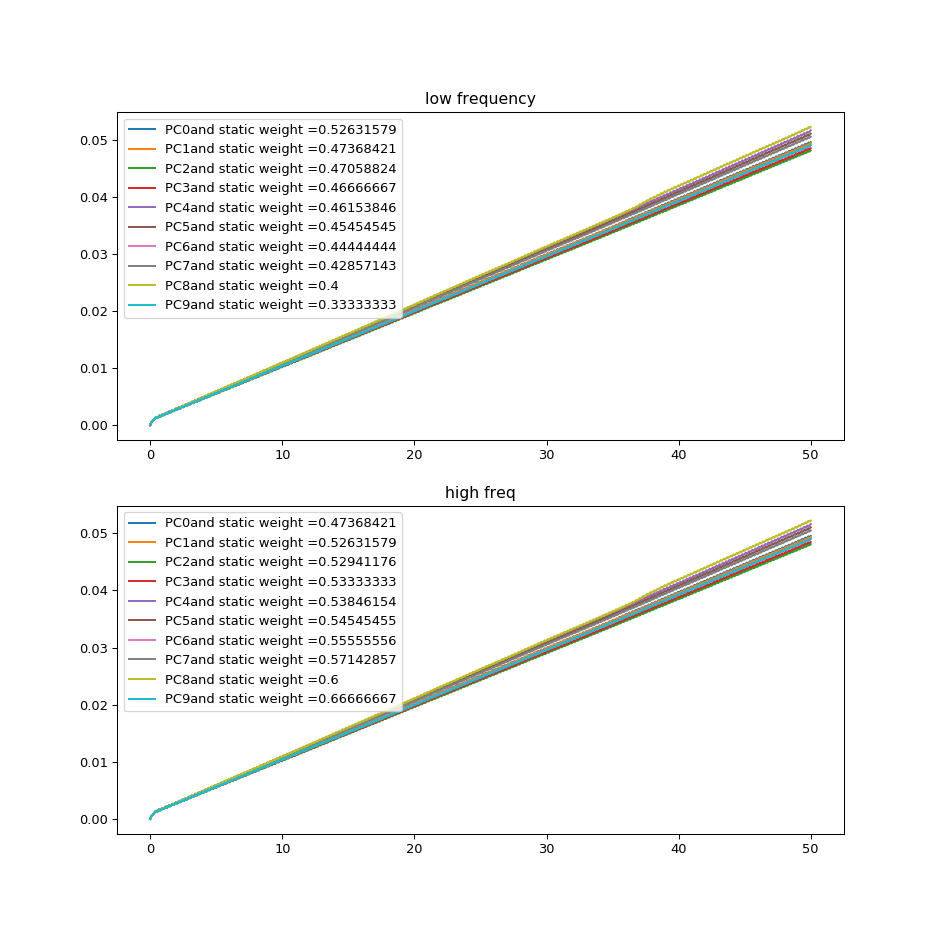

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
 [py.warnings]
WARNING    C:\Us

9

In [9]:
ff, aa = plt.subplots(2,1, figsize=(10,10))
#intr= [2.02, 1.94, 2.08, 1.98, 2.04, 1.96, 2.,   2.06, 1.9,  1.92]
static_weights= [0.52631579, 0.47368421, 0.47058824, 0.46666667, 0.46153846, 0.45454545,
 0.44444444, 0.42857143, 0.4, 0.33333333, 0.47368421, 0.52631579,0.52941176, 0.53333333, 0.53846154, 0.54545455, 0.55555556,
                 0.57142857,0.6,0.66666667]
labelsname_lf = ['PC' + str(p) + 'and static weight =' + str(static_weights[p]) for p in
             range(0,nrPC)]
labelsname_hf = ['PC' + str(p) + 'and static weight =' + str(static_weights[p+10]) for p in
             range(0,nrPC)]
for p in range(0,nrPC):
    ax4 = plt.subplot(211)
    plt.plot(time,PV['delta_weight_coupled'][p])
    
plt.legend(labelsname_lf)
plt.title('low frequency')
  
for p in range(0,nrPC):
    ax1 = plt.subplot(212)
    plt.plot(time,PV['delta_weight_coupled'][p+10])
plt.title('high freq')
plt.legend(labelsname_hf)
plt.show()
labels = ['PC'+str(p) for p in range(0,nrPC)]
#for i in range(0,nrPC):
#    plt.figure()
    #plt.title(labels[i])
#    plt.plot(time,PV['delta_weight_uncoupled'][i], label='low freq')
#    plt.plot(time,PV['delta_weight_uncoupled'][i+10], label='high freq')
#    plt.legend(['2 Hz','20Hz'])
#    plt.show()
p

<IPython.core.display.Javascript object>


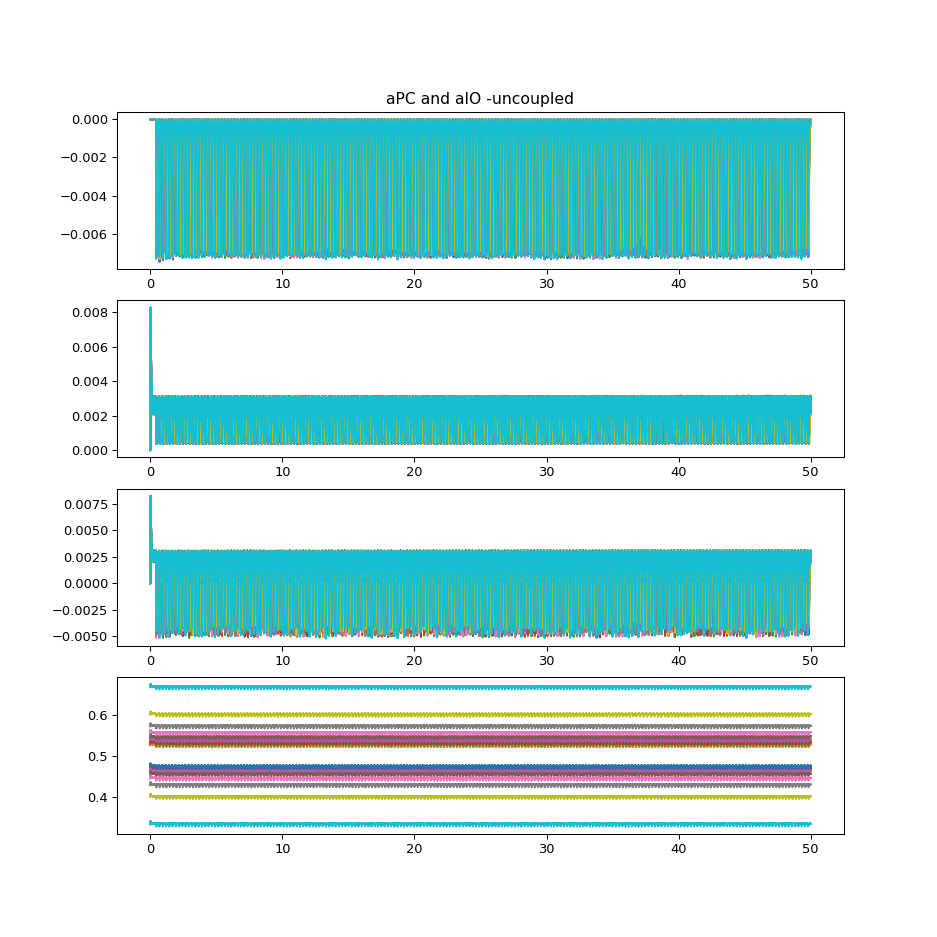

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\i

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py

 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\

 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipyker

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\i

In [10]:
f, a = plt.subplots(4,1, figsize=(10,10))
f.canvas.set_window_title('')
static_weights= [0.52631579, 0.47368421, 0.47058824, 0.46666667, 0.46153846, 0.45454545,
 0.44444444, 0.42857143, 0.4, 0.33333333, 0.47368421, 0.52631579,0.52941176, 0.53333333, 0.53846154, 0.54545455, 0.55555556,
                 0.57142857,0.6,0.66666667]
for i in range(0,nrIO):
    ax1= plt.subplot(411)
    plt.plot(time,PV['a_IO_coupled'][i])

    ax2= plt.subplot(412,sharex=ax1)
    plt.plot(time,PV['a_PC_coupled'][i])

    ax3 = plt.subplot(413,sharex=ax1)
    plt.plot(time,PV['a_IO_coupled'][i]+PV['a_PC_coupled'][i])
    
    ax4 = plt.subplot(414,sharex=ax1)
    plt.plot(time, np.ones(len(time))*static_weights[i]+PV['a_IO_coupled'][i]+PV['a_PC_coupled'][i])
ax1.title.set_text('aPC and aIO -uncoupled')

